In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
np.random.seed(42)
# Load the CSV without headers
data_path = r"DATA_W3_L2.csv"
df = pd.read_csv(data_path, header=None)
df.columns = ['x1', 'x2', 'label']

In [31]:
# Split the data into input and o/p labels
X= df[["x1", "x2"]].values #input features array
y= df[["label"]].values #output label array

print(X.shape) # 82 row, 2 columns
print(y.shape) # 82 row, 1 columns

df.head(5)

(83, 2)
(83, 1)


,x1,x2,label
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [32]:
#step fucntion
def stepFunction(X,W,b): 
    t = (np.matmul(X,W)+b)[0]  #t = np.dot(X, W).item() + b or #t = x1w1 +x2w2+ b
    return 1 if t >= 0 else 0

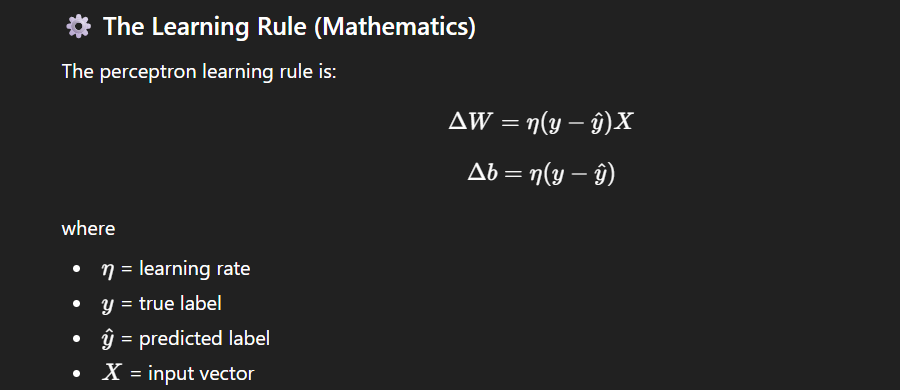

In [33]:
# Perceptron step
def perceptronStep(X,y,W,b,learn_rate=0.01): #for updating weights and biases on each epoch
    for i in range(len(X)):
        y_hat = stepFunction(X[i],W,b) #calculatin the predicted label 0 or 1.
        if y[i] - y_hat == 1:
            # if the true output is 1, but the model predicted 0, (true-predited = 1)
            # the perceptron underfired.
            # You need to increase weights and bias.
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b+=learn_rate
        elif y[i]-y_hat == -1:
            # if the true output is 0, but the model predicted 1, (true-predited = -1)
            # the perceptron overfired.
            # You need to decrease weights and bias.
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return  W, b 

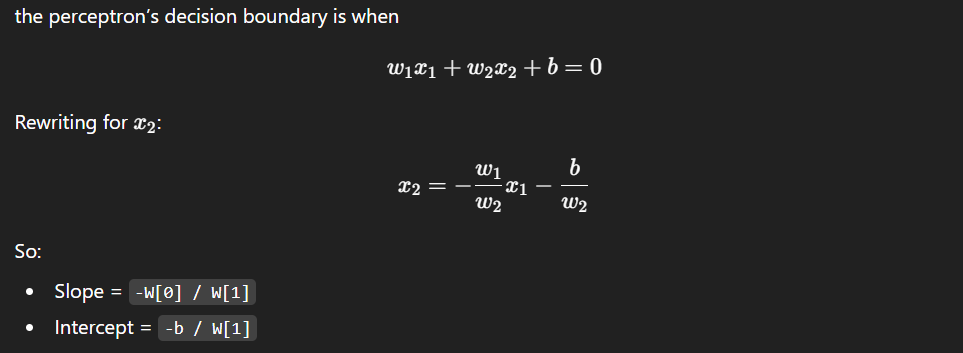

In [34]:
# Perceptron training function
def trainPerceptronAlgorithm(X,y,lean_rate=0.01, num_epochs=25):
    x_min,x_max=min(X.T[0]),max(X.T[0]) # finding min and max value of feature  x1
    x2_min,x2_max=min(X.T[1]),max(X.T[1] # finding min and max value of feature  x2
                                  )
    #can also be written like this with out using transpose of matrix
    # x_min, x_max = X[:,0].min(), X[:,0].max()
    # x2_min, x2_max = X[:,1].min(), X[:,1].max()

    W = np.random.rand(2,1)
    print(W)
    b = np.random.rand(1)[0]+x_max 
    boundary_lines= []
    for x in range(num_epochs):
        W, b = perceptronStep(X,y,W,b,lean_rate)  
        boundary_lines.append((-W[0] / W[1], -b / W[1]))
        x=x+2
    return boundary_lines



[[0.37454012]
 [0.95071431]]


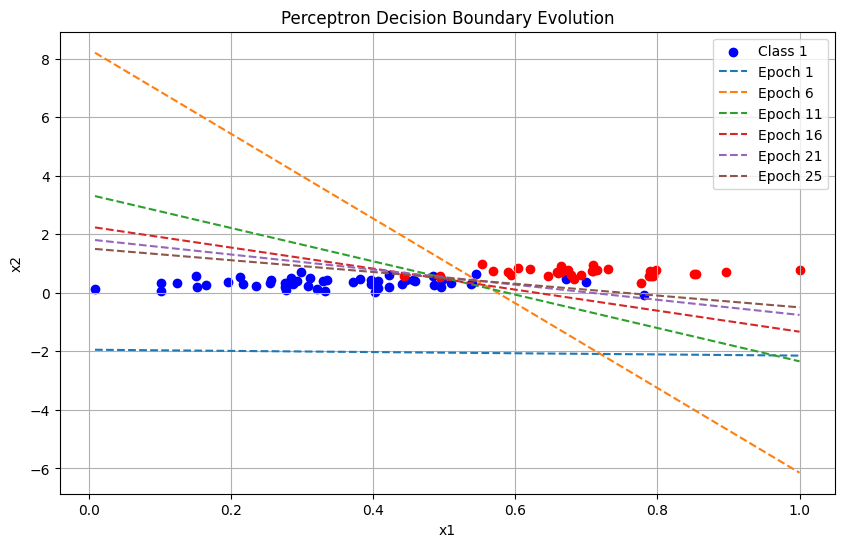

In [35]:
# Train and get boundaries
boundaries = trainPerceptronAlgorithm(X, y)

# ---------------------------------------------------------------------------
plt.figure(figsize=(10, 6))

# Plot data points
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i][0], X[i][1], color='red', label='Class 0' if i == 0 else "")
    else:
        plt.scatter(X[i][0], X[i][1], color='blue', label='Class 1' if i == 1 else "")

# Plot decision boundary for selected epochs
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
for i, (slope, intercept) in enumerate(boundaries):
    if i % 5== 0 or i == len(boundaries) - 1:  # Show every 5th + final epoch
        y_vals = slope * x_vals + intercept
        plt.plot(x_vals, y_vals, linestyle='--', label=f'Epoch {i+1}')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Decision Boundary Evolution')
plt.legend()
plt.grid(True)
plt.show()